# Check Efficiency Maps

In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from itertools import product
import seaborn as sns
from matplotlib.colors import LogNorm
pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.colormaps['RdYlBu']

In [3]:
#Load scan data for simplified Strong scenario
dataDF = pd.read_pickle('./GoN1Recast.pcl')

In [4]:
mGoDict = {mGo : df for mGo,df in dataDF.groupby('mLSP')}

In [5]:
len(mGoDict)

12

### Plot efficiencies

/tmp/ipykernel_24024/4148291051.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


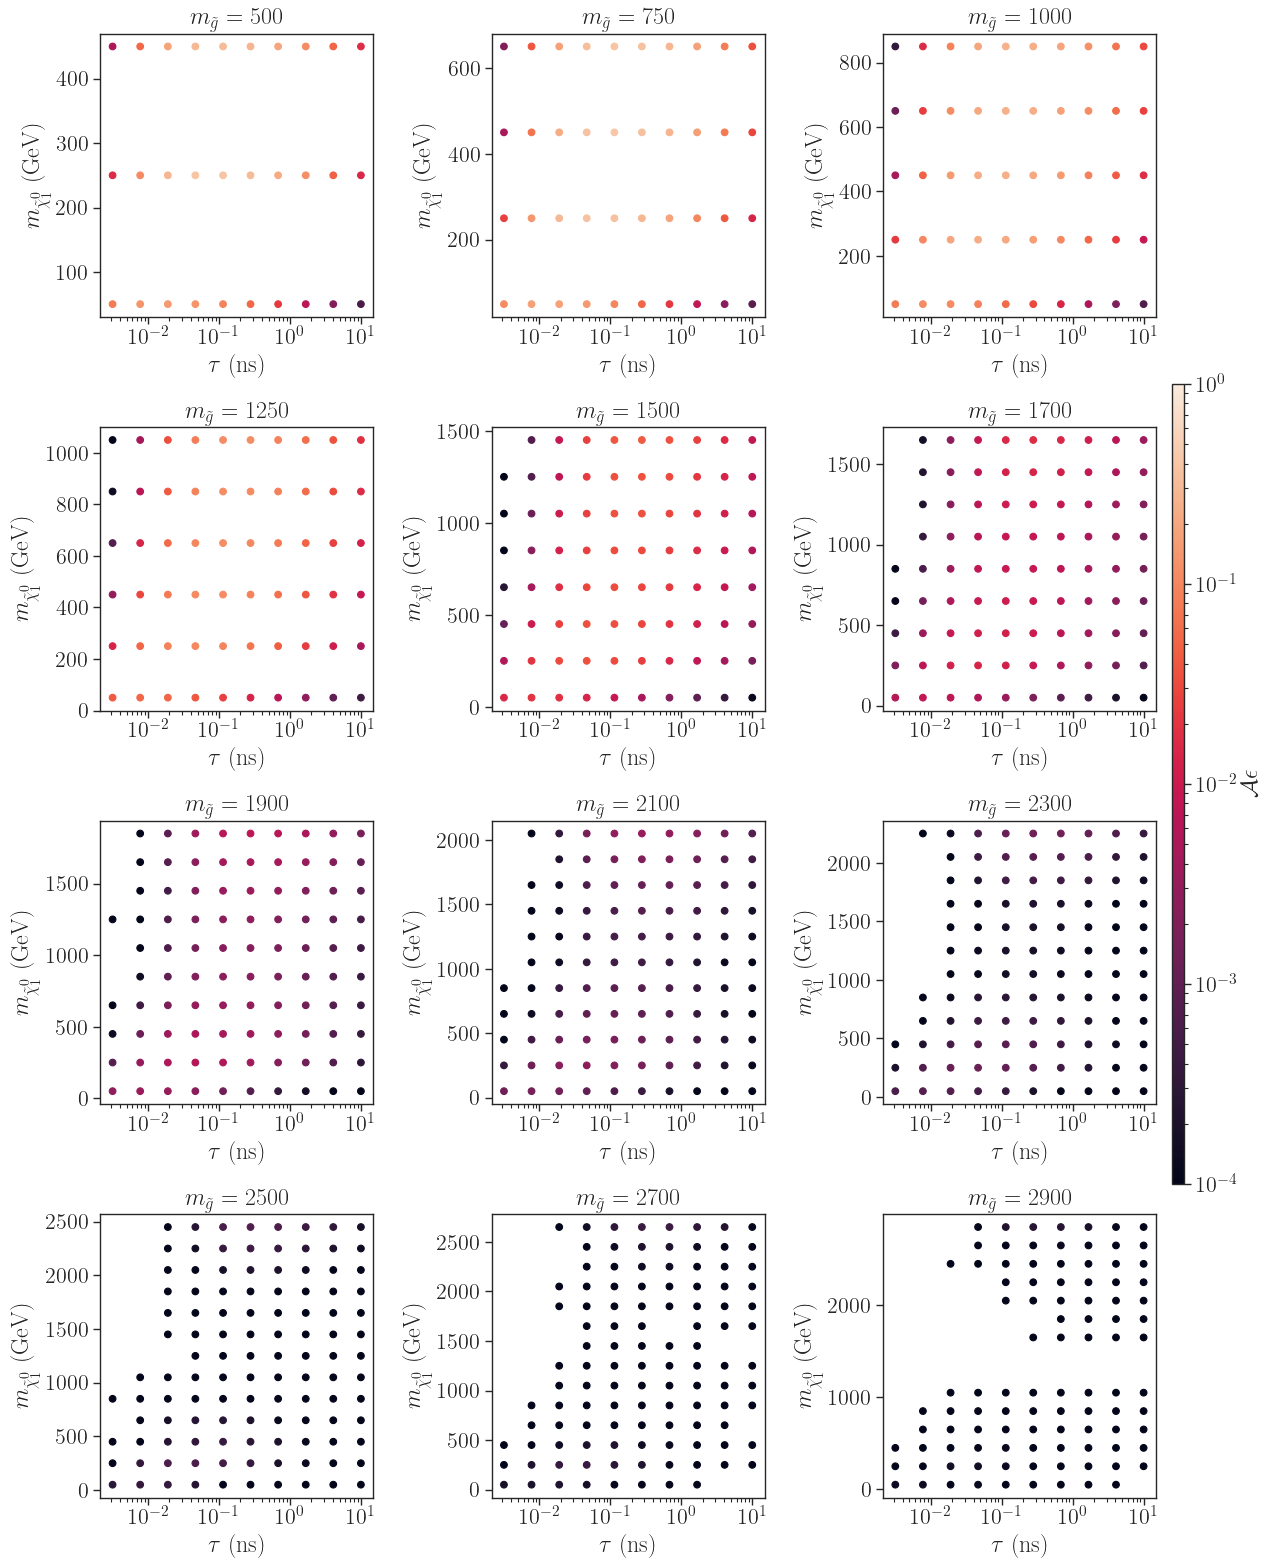

In [9]:
fig,axarr = plt.subplots(nrows=int(len(mGoDict)/3),ncols=3,figsize=(12,4*int(len(mGoDict)/3)))
axarr = axarr.reshape(-1)
sr = 'Trackless'
for idf,mGo in enumerate(mGoDict.keys()):
    ax = axarr[idf]
    df = mGoDict[mGo]
    pts = df[df['SR'] == sr][['mLLP','tau_ns','AccEff']].to_numpy()
    p = ax.scatter(pts[:,1],pts[:,0],c=pts[:,2],norm=LogNorm(vmin=1e-4,vmax=1.0))
    ax.set_xscale('log')
    ax.set_xlabel(r'$\tau$ (ns)')
    ax.set_ylabel(r'$m_{\tilde \chi_1^0}$ (GeV)')
    ax.set_title(r'$m_{\tilde g} = %1.0f$' %mGo)

fig.subplots_adjust(right=0.9,top=1.1)
cbar_ax = fig.add_axes([0.99, 0.25, 0.01, 0.5]) 
fig.colorbar(p,label=r'$\mathcal{A} \epsilon$',cax=cbar_ax)
plt.tight_layout()
plt.show()


### Print Efficiency Maps

In [11]:
# Restrict to deltaM =0,10
dataDF['width'] = 6.582e-16/dataDF['tau_ns']
pts_Trackless = dataDF[dataDF['SR']=='Trackless'][['mLLP','mLSP','width', 'tau_ns','AccEff','AccEffErr']].to_numpy()
pts_HighPT = dataDF[dataDF['SR']=='HighPT'][['mLLP','mLSP','width','tau_ns','AccEff','AccEffErr']].to_numpy()

In [13]:
np.savetxt('GoN1_effs_Trackless.csv',pts_Trackless,delimiter=',',fmt='%1.4e',header='  mN1_GeV, mGluino_GeV, width_GeV, tau_ns,     Eff,       EffErr',comments='#Efficiencies for the Trackless SR obtained with recasting for the Strong model:\n# (pp > Gluino Gluino, Gluino > q,q,N1).\n')
np.savetxt('GoN1_effs_HighPT.csv',pts_HighPT,delimiter=',',fmt='%1.4e',header='  mN1_GeV, mGluino_GeV, width_GeV, tau_ns,     Eff,       EffErr',comments='#Efficiencies for the High PT SR obtained with recasting for the Strong model:\n# (pp > Gluino Gluino, Gluino > q,q,N1).\n')